# Разложение Шура

Любую квадратную матрицу $A$ можно преобразованием $U$ подобия привести к верхнетреугольной матрице $R$,
причем преобразование $U$ можно выбрать унитарным (ортогональным для вещественных матриц):
$$A=URU^*,\quad U^*AU=R,\quad UU^*=U^*U=1,$$
такое представление матрицы называется [разложением Шура](https://en.wikipedia.org/wiki/Schur_decomposition).
Здесь и далее мы будем обозначать единичную матрицу подходящего размера через $1$,
а сопряженную матрицу к $A$ через $A^*$.
Элементы сопряженной матрицы получаются транспонирование матрицы с последующим комплексным сопряжением:
$$
A^*=\bar A^T,\quad (A^*)_{nk}=\overline{A_{kn}}. 
$$ 
Столбцы матрицы преобразования $U$ называются векторами Шура.

## Задания.

1. Какой смысл имеют диагональные элементы матрицы $R$?

2. В каком случае вектора Шура оказываются собственными векторами?

3. Покажите, что сумма квадратов абсолютных значений всех недиагональных элементов матрицы $R$ не зависит от выбора $U$ и определяется только матрицей $A$:
$$ N = \sum_{n}\sum_{k>n} |R_{nk}|^2.$$
Какой смысл вы можете придать этой сумме?

Первый вектор Шура всегда является собственным, поэтому мы можем построить наивную процедуру
вычисления разложения Шура, имея способ вычисления собственных чисел и векторов.
Проще всего оказывается вычислить самое большое по модулю собственное значение матрицы (спектральный радиус),
для этого можно воспользоваться [методом степеней](https://en.wikipedia.org/wiki/Power_iteration).
Суть метода заключается в вычислении последовательности:
$$e_{n+1}=\frac{Ae_n}{\|Ae_n\|},$$
которая при определенных условиях сходится к собственному вектору, отвечающему максимальному по модулю собственому значению $A$. 

## Задания.

4. Предложите достаточные условия сходимости степенного метода.

5. Реализуйте степенной метод. Для проверки результата воспользуйтесь функцией 
[scipy.linalg.norm(A, ord=2)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html),
которая на квадратной матрице $A$ возвращает ее спектральных радиус.

6. Первый вектор Шура находится степенным методом, как можно найти второй вектор Шура? 
__Указание:__ Рассмотрите подматрицу $A_{2\colon,2\colon}$.

7. Реализуйте функцию для построения разложения Шура с помощью степенного метода. В каких случаях алгоритм сойдется? В каких случаях сойдется к разложению Шура? С какой скоростью итерации сходятся в случае сходимости?

8. Обобщите степенной метод так, чтобы одновременно вычислялось несколько собственных векторов. 
Реализуйте эту модификацию. Какие условия являются достаточными для сходимости вашего метода.

Задача вычисления собственных чисел может быть плохо обусловлена для матрицы общего вида. 
Наибольшую трудность представляют близкие собственные значения и вырожденные собственные значения. 
Проведите несколько экспериментов, используя библиотечную функцию для вычисления разложения Шура 
[scipy.linalg.schur](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).


## Задания.

9. Предложите матрицу, у которой левый и правый собственные вектора для одного собственного значения почти ортогональны. Добавляя малое возмущение к матрице (можно воспользоваться [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)) и находя собственные значения для возмущенной матрицы через `scipy.linalg.schur` оцените число обусловленности для вычисления собственного числа. Сравните с теорией.

10. Рассмотрите малое возмущение $\epsilon$ для матрицы 
$$A=\begin{pmatrix}1&a\\\epsilon&1\end{pmatrix},$$
где $a$ - параметр. Насколько сильно возущение изменяет собственные значения?
Собственные вектора (`scipy.linalg.eig`)?

На практике для вычисления разложения Шура как правило используется [UR алгоритм](https://en.wikipedia.org/wiki/QR_algorithm) и его варианты. 
Мы ограничимся изучением этого метода только для симметричных матриц.

Пусть матрица $A$ имеет только вещественные коэффициенты и симметрична, т.е. $A^T=A$.
В этом случае матрица $R$ в разложение Шура для матрица $A$ оказывается диагональным, т.е. выполняется спектральное разложение.

Перед выполнение QR алгоритма матрица $A$ приводится преобразованием подобия к более простому виду $A_0=VAV^T$,
как правило к виду [матрицы Хессенберга](https://en.wikipedia.org/wiki/Hessenberg_matrix).
Преобразование $V$ можно представить, например, в виде цепочки [вращений Гивенса](https://en.wikipedia.org/wiki/Givens_rotation).
На одном шаге QR алгоритма строится QR разложение матрицы $A_n=Q_nR_n$,
затем матрицы из разложения перемножаются в обратном порядке, формируя новый член последовательности:
$A_{n+1}=R_nQ_n$.
Все матрицы в последовательности подобны: $A_{n+1}=Q_n^TA_nQ_n$.
Итерации повторяются до тех пор, пока матрица $A_n$ не станет достаточно треугольной.

В наивном варианте QR алгоритм не всегда сходится, однако ситуацию можно исправить, добавив в сдвиги.
На каждом шаге алгоритма будем строить QR разложение для $A_n-\zeta_n=Q_nR_n$ с подходящим $\zeta_n$.
Следующий член последовательности определим так $A_{n+1}=R_nQ_n+\zeta_n$.
Последовательность $\zeta_n$ выбирается так, чтобы $\zeta_n$ сходилось к минимальному собственному числу,
например, полагая $\zeta_n$ равным элементу $R$ из последнего столбца и строки.
В этому случае итерации почти всегда сходятся и дают кубическую скорость сходимости.

## Задания.

11. Реализуйте QR алгоритм со сдвигами для симметричной матрицы $A$. 
Экспериментально проверьте скорость сходимости. 
Сравните со скорость сходимости степенного метода.

12. **(повышенная сложность)** Реализуйте неявный QR алгоритм. Сравните его работу с работой явного метода.

13. Предложите и реализуйте метод вычисления [сингулярного (SVD) разложения](https://en.wikipedia.org/wiki/Singular_value_decomposition), используя разложение Шура. Постарайтесь избежать вычисления матриц $AA^T$ и $A^TA$.

# Решения

### Задание 1

*Какой смысл имеют диагональные элементы матрицы $R$?*

Диагональные элементы матрицы $R$ являются ее собственными числами, а также собственными числами исходной матрицы $A$. Покажем это (пишем характеристическое уравнение):

$$0 = \det (A-\lambda I) = \det(URU^H-\lambda I) = \det(URU^H-U\lambda IU^H) = \det(R-\lambda I)$$

Значит $spec(A)=spec(R)$

Т.к. матрица $R$ - верхнетреугольная, то $\det(R-\lambda I)=\prod\limits_k(R_{kk}-\lambda)=0$ - т.е. на диагонали матрицы $R$ находятся собственные числа матрицы $R$ (и соответственно $A$).

### Задание 2

*В каком случае вектора Шура оказываются собственными векторами?*

Векторы Шура - столбцы матрицы $U$ ($u_i = U\cdot e_i$), где $e_1=[1, 0, 0, ..., 0]^T, e_2=...$.

**Заметим, что в общем случае:**

- Первый вектор Шура всегда собственный, т.к. $Au_1=AUe_1=URU^HUe_1=URe_1=R_{11}Ue_1=R_{11}u_1$
- Если над $k$-ым диагональным элементом в матрице $R$ стоят только нули, то вектор $u_k$ тоже собственный. Доказательство аналогичное предыдущему ($Au_k=R_{kk}u_k$).

**Если матрица диагональная:**

Тривиальный случай, на диагоналях сразу стояю все собственные числа. Разложение тривиально. Матрица $U=I$ и все векторы собственные.

**Если матрица нормальная (оператор нормальный):**

(1) $AA^H=U^HRU\cdot(U^HRU)^H=U^HRUU^HR^HU=U^HRR^HU$

(2) $A^HA=(U^HRU)^H\cdot U^HRU=U^HR^HUU^HRU=U^HR^HRU$

Выражения (1) и (2) должны быть равны --> $RR^H=R^HR$. Смотрим диагональный элемент каждой матрицы:

$$(RR^H)_{ii}=\sum\limits_{k\geq i} R_{ik}\cdot R^*_{ik} = \sum\limits_{k \leq i} R_{ki}\cdot R^*_{ki} =(R^HR)_{ii}$$

$$\sum\limits_{k\geq i} |R_{ik}|^2 = \sum\limits_{k \leq i} |R_{ki}|^2$$

Расписываем сумму для $i=1$, с учетом того, что $R$ - **верхнетреугольная**:

$$|R_{11}|^2+|R_{12}|^2+|R_{13}|^2+...=|R_{11}|^2$$

Тогда, вычев правую часть из левой получится, что $|R_{12}|^2+|R_{13}|^2+...=0$, значит $\forall k>1 R_{1k}=0$.

Данную процедуру можно продолжить для $i=2, 3, ...$. Значит матрица $R$ - диагональна.

Тогда из выкладки в задании 1 получается, что элементы матрицы $R$ - собственные числа. Каждый вектор Шура домножается на только одно собственное число. Значит векторы Шура в этом случае являются собственными. (Разложение совпадает со спектральным)

### Задание 3

*Покажите, что сумма квадратов абсолютных значений всех недиагональных элементов матрицы $R$ не зависит от выбора $U$ и определяется только матрицей $A$:*
$$ N = \sum_{i}\sum_{k>i} |R_{ik}|^2.$$
*Какой смысл вы можете придать этой сумме?*

**Доказательство:**

1. Пусть матрица $A$ имеет 2 разложения Шура: $A=V^HSV$ и $A=U^HRU$. Тогда можно записать равенство:

$$SVU^H=VU^HR$$

Обозначим за $W=VU^H$, тогда можно записать в виде $(W^HS^H)^H=WR$. Заметим, что $W$ - унитарное преобразование (как композиция унитарных).

2. Еще заметим, что диагональные элементы матриц $R$ и $S$ совпадают, тк эти матрицы получены разложением Шура.

3. Знаем, что унитарное преобразование не меняет норму вектора, значит (учитывая, что $R$ - верхнетреугольная, а $S^H$ - нижнетреугольная)

$$\forall i: \sum_{k\leq i} |R_{ki}|^2 = \sum_{k} |(WR)_{ki}|^2$$

$$\forall i: \sum_{k\geq i} |S^H_{ki}|^2 = \sum_{k} |(W^HS^H)_{ki}|^2$$

Правые части данных выражений равны по пункту 1. Значит равны и левые.

4. Теперь просуммируем равенство по всем $i$:

$$\sum_{i}\sum_{k\leq i} |R_{ki}|^2 = \sum_{i}\sum_{k\geq i} |S^H_{ki}|^2$$

Так как диагональные элементы матриц совпадают (пункт 2), то можно их убрать из суммы и элементы матрицы $S^H$ выразить через элементы матрицы $S$:

$$\sum_{i}\sum_{k<i} |R_{ki}|^2 = \sum_{i}\sum_{k<i} |S_{ki}|^2$$

Это и есть требуемое равенство с точностью до перестановки порядка суммирования.

**Интерпретация данной величины:**

$\beta = \sum_{i}\sum_{k<i} |R_{ki}|^2$ в случае, когда исходная матрица нормальная будет равна 0. Тогда данную величину $\beta$ можно назвать мерой отклонения исходной матрицы $A$ от нормальной.

### Задание 4

*Предложите достаточные условия сходимости степенного метода.*

**Note:** Сразу откинем из рассмотрения случай, когда спектр комплексный. В таком случае максимальному по модулю собственному числу будет соответствовать его сопряженное, которое тоже будет решением характеристического уравнения. Поэтому сходимости метода может и не быть.

Если спектр матрицы вещественный, то можно предложить следующее утверждение:

**Утв.** Метод степеней сходится для матрицы $A$ с вещественным спектром, если $\exists \lambda_1 \in \text{spec}(A): \forall i = 2,...,N \quad |\lambda_1| > |\lambda_i|$

**Док-во:**

0. Метод можно описать формулой: $x^{(n+1)}=\frac{Ax^{(n)}}{\|Ax^{(n)}\|}$

1. Пусть $\{e_i\}^N_{i=1}$ - ортонормированный собственный базис. Мы выбираем случайный вектор, который можно разложить по этому базису: $x^{(0)}=\sum\limits_{i=1}^N\alpha_i e_i$.

2. Смотрим что происходит на $n+1$ шаге:

- $Ax^{(n)}=\lambda_1^{n+1}\alpha_1 e_1 + \sum\limits_{i=2}^N \lambda_i^{n+1}\alpha_i e_i$

- $\|Ax^{(n)}\|=|\lambda_1|^{n+1}\sqrt{\alpha_1^2 + \sum\limits_{i=2}^N\alpha_i^2 |\frac{\lambda_i^{n+1}}{\lambda_1^{n+1}}|^2}$

3. Посмотрим отличие от искомого вектора $e_1$:

$$\|x^{(n+1)}-e_1\|=\left\|\dfrac{\lambda_1^{n+1}\alpha_1 e_1 + \sum\limits_{i=2}^N \lambda_i^{n+1}\alpha_i e_i}{|\lambda_1|^{n+1}\sqrt{\alpha_1^2 + \sum\limits_{i=2}^N\alpha_i^2 |\frac{\lambda_i^{n+1}}{\lambda_1^{n+1}}|^2}} - e_1\right\| \approx \left\|\dfrac{\lambda_1^{n+1}\alpha_1 e_1 + \sum\limits_{i=2}^N \lambda_i^{n+1}\alpha_i e_i}{|\lambda_1|^{n+1}|\alpha_1|} - e_1\right\| =$$

$$= \left\|\text{sgn}(\lambda_1^{n+1}\alpha_1) e_1 + \sum\limits_{i=2}^N \text{sgn}(\lambda_i^{n+1}\alpha_i)|\frac{\lambda_i^{n+1}}{\lambda_1^{n+1}}|\cdot|\frac{\alpha_i}{\alpha_1}| e_i - e_1\right\|$$

Нам не важно направление (знак) вектора $e_1$, который мы ищем, поэтому выберем его равным $\text{sgn}(\lambda_1^{n+1}\alpha_1)$, тогда ошибка метода степеней получется:

$$\|x^{(n+1)}-e_1\|=\left\|\sum\limits_{i=2}^N \text{sgn}(\lambda_i^{n+1}\alpha_i)|\frac{\lambda_i^{n+1}}{\lambda_1^{n+1}}|\cdot|\frac{\alpha_i}{\alpha_1}| e_i\right\| = O\left(\max_i\left|\frac{\lambda_i}{\lambda_1}\right|^{n+1}\right) \rightarrow 0 \quad (n \rightarrow +\infty)$$

4. Значит метод будет сходиться к $e_1$ в этом случае.

### Задание 5

*Реализуйте степенной метод. Для проверки результата воспользуйтесь функцией [scipy.linalg.norm(A, ord=2)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html), которая на квадратной матрице $A$ возвращает ее спектральных радиус.*

In [1]:
import numpy as np
from scipy.linalg import norm, schur, qr
from lab4_algorithms import*
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
A = np.array([[0.5, 0.5], [0.2, 0.8]])
B = np.array([[0.5, 0], [0, 0.1]])
print("Power iteration:", power_iteration(A))
print("Scipy norm:", norm(A, 2))
print("Power iteration:", power_iteration(B, 30))
print("Scipy norm:", norm(B, 2))

Power iteration: (0.9999999968831252, array([0.70710679, 0.70710677]))
Scipy norm: 1.047871858499512
Power iteration: (0.5, array([1.00000000e+00, 6.24980227e-09]))
Scipy norm: 0.5


In [3]:
A = np.array([[1, 0.5, -0.2], [0.3, 0.8, -0.1], [-0.5, -0.6, -1]])
ref_eigval = norm(A, 2)
tmp = np.linalg.eig(A)
ref_eigvec = tmp.eigenvectors[:, np.argmax(np.abs(tmp.eigenvalues))]
num_iter = np.linspace(10, 1000, 16, dtype=np.int32)
print("norm(A, 2)  : ", ref_eigval)
print("eigenvalues : ", tmp.eigenvalues)
print("ref eigvec  : ", ref_eigvec)

eigval_err = np.empty_like(num_iter, dtype=np.float64)
eigvec_err = np.empty_like(num_iter, dtype=np.float64)
for i in range(num_iter.shape[0]):
    eigval, eigvec = power_iteration(A, max_iter=num_iter[i], tol=0)
    eigval_err[i] = np.abs(ref_eigval-eigval)
    eigvec_err[i] = np.mean(np.abs(ref_eigvec-eigvec))

norm(A, 2)  :  1.5809147053318344
eigenvalues :  [-1.06731753  1.36805255  0.49926498]
ref eigvec  :  [ 0.82186978  0.48628486 -0.29674418]


In [4]:
ref_convergence = (1.06731753 / 1.36805255)**num_iter

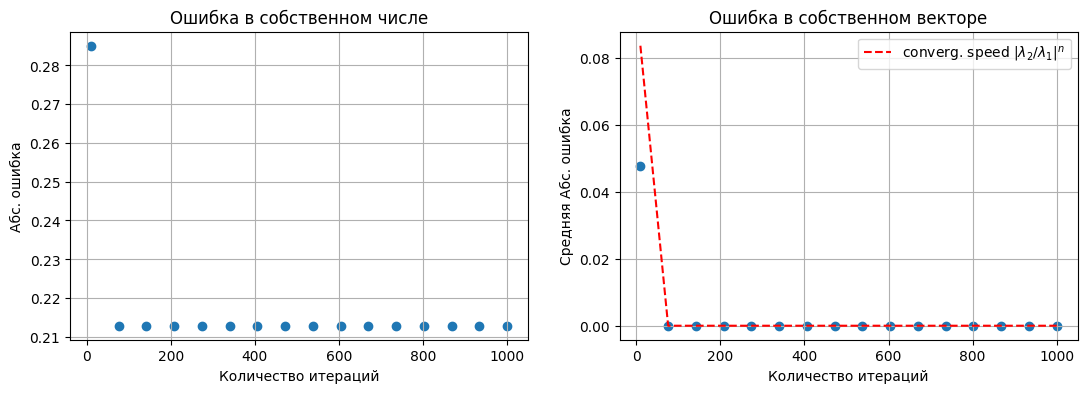

In [5]:
fig1 = plt.figure(figsize=[13,4])

ax_1 = fig1.add_subplot(121)
ax_1.set_title('Ошибка в собственном числе')
ax_1.scatter(num_iter, eigval_err)
ax_1.set_xlabel('Количество итераций')
ax_1.set_ylabel('Абс. ошибка')
ax_1.grid()

ax_2 = fig1.add_subplot(122)
ax_2.set_title('Ошибка в собственном векторе')
ax_2.plot(num_iter, ref_convergence, 'r--', label=r'converg. speed $|\lambda_2/\lambda_1|^n$')
ax_2.scatter(num_iter, eigvec_err)
ax_2.set_xlabel('Количество итераций')
ax_2.set_ylabel('Средняя Абс. ошибка')
ax_2.legend()
ax_2.grid()

plt.show()

### Задание 6

*Первый вектор Шура находится степенным методом, как можно найти второй вектор Шура? (Указание: Рассмотрите подматрицу $A_{2\colon,2\colon}$.)*

**Идея:** 
- Найденный собственный вектор $e_1$ (он равен первому вектору Шура $u_1=e_1$) запишем в матрирцу $B=(u_1|(\delta_{i2})|(\delta_{i3})|...)$.
- Затем выполним для нее QR-разложение матрицы $B$.
- Рассмотрим матрицу Q. Ее первый столбец останется равным $e_1$, а остальные столбцы будут образовывать ортонормированный базис.
- Применим к матрице A (исходной) преобразование: $Q^TAQ$ первый столбец будет содержать 1 в самом первом элементе и 0 в остальных элементах.
- Рассмотрим подматрицу $Q^TAQ$[2:N, 2:N]. Найдем для нее собственный вектор методом степеней - $q_1$.
- Находим собственный вектор в исходном базисе: $u_2=Q\cdot [0 | q_1^T]^T$, который будет ортогонален $u_1$.

Такой алгоритм можно продолжить иттерационно. Далее у нас будет матрица $B=(u_1|u_2|(\delta_{i3})|...)$

### Задание 7

*Реализуйте функцию для построения разложения Шура с помощью степенного метода. В каких случаях алгоритм сойдется? В каких случаях сойдется к разложению Шура? С какой скоростью итерации сходятся в случае сходимости?*

In [7]:
'''some matrix'''
A = np.array([[4, 1, 0.8],
              [1, 3, 1], 
              [0, 1, 2]])

U, R = schur_decomposition_power_method(A)
print("U:\n", U)
print("R:\n", R)
print("Check A = UTU*:\n", U @ R @ U.T - A)

'''normal matrix'''
r = 0.3 # medium (0 - low, 0.3 - medium, 0.9 - high)
B = np.array([[1, r**(1/9), r**(4/9), r],
              [r**(1/9), 1, r**(1/9), r**(4/9)],
              [r**(4/9), r**(1/9), 1, r**(1/9)],
              [r, r**(4/9), r**(1/9), 1]])

U, R = schur_decomposition_power_method(B)
print("U:\n", U)
print("R:\n", R)
print("Check B = UTU*:\n", U @ R @ U.T - B)

U:
 [[-0.8171053  -0.52328663  0.24188845]
 [-0.54402721  0.56112253 -0.62383964]
 [-0.19071788  0.64133658  0.74317836]]
R:
 [[ 4.85252353e+00 -4.99071663e-01 -4.48898025e-01]
 [ 4.79216597e-08  2.72651498e+00 -4.35221757e-01]
 [ 4.12932493e-16  1.42960402e-08  1.42096150e+00]]
Check A = UTU*:
 [[-1.33226763e-15  1.11022302e-15  5.55111512e-16]
 [ 1.33226763e-15 -2.66453526e-15 -4.44089210e-16]
 [ 1.01512442e-15 -9.99200722e-16 -4.44089210e-16]]
U:
 [[-0.44914143  0.65286248  0.54614281 -0.27160741]
 [-0.54614281  0.27160742 -0.44914143  0.65286248]
 [-0.54614281 -0.2716074  -0.44914144 -0.65286248]
 [-0.44914144 -0.65286248  0.54614281  0.27160741]]
R:
 [[ 3.07580158e+00 -1.91578063e-08 -2.36216632e-16  2.37557597e-16]
 [-1.91578064e-08  8.20304487e-01  4.47716671e-09 -2.09763870e-17]
 [-1.95252586e-16  4.47716664e-09  9.89855068e-02 -4.61023884e-10]
 [ 1.00542807e-17  2.18036741e-17 -4.61023983e-10  4.90842999e-03]]
Check B = UTU*:
 [[1.11022302e-15 6.66133815e-16 5.55111512e-16 3.3

In [ ]:
R_ref, U_ref = schur(B)
print("R_ref:\n", R_ref)
print("R_my:\n", R)

R_ref:
 [[ 3.07580158e+00 -4.82578387e-16 -8.84572089e-16  4.44215436e-16]
 [ 0.00000000e+00  8.20304487e-01 -8.18719537e-17  2.97386092e-16]
 [ 0.00000000e+00  0.00000000e+00  9.89855068e-02 -7.74558731e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.90842999e-03]]
R_my:
 [[ 3.07580158e+00 -1.91578063e-08 -2.36216632e-16  2.37557597e-16]
 [-1.91578064e-08  8.20304487e-01  4.47716671e-09 -2.09763870e-17]
 [-1.95252586e-16  4.47716664e-09  9.89855068e-02 -4.61023884e-10]
 [ 1.00542807e-17  2.18036741e-17 -4.61023983e-10  4.90842999e-03]]


### Задание 8

*Обобщите степенной метод так, чтобы одновременно вычислялось несколько собственных векторов. Реализуйте эту модификацию. Какие условия являются достаточными для сходимости вашего метода.*

Голуб - раздел 7.3.2.

In [11]:
lam, vecs = orthogonal_iteration(B, 4)
print("eigenvalues:\n", lam)
print("eigenvectors:\n", vecs)
print("Schur")
print("R:\n", R_ref)
print("U:\n", U_ref)

eigenvalues:
 [3.07580158 0.82030449 0.09898551 0.00490843]
eigenvectors:
 [[-0.44914144 -0.65286248  0.54614281 -0.27160741]
 [-0.54614281 -0.27160741 -0.44914144  0.65286248]
 [-0.54614281  0.27160741 -0.44914144 -0.65286248]
 [-0.44914144  0.65286248  0.54614281  0.27160741]]
Schur
R:
 [[ 3.07580158e+00 -4.82578387e-16 -8.84572089e-16  4.44215436e-16]
 [ 0.00000000e+00  8.20304487e-01 -8.18719537e-17  2.97386092e-16]
 [ 0.00000000e+00  0.00000000e+00  9.89855068e-02 -7.74558731e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.90842999e-03]]
U:
 [[ 0.44914144  0.65286248  0.54614281 -0.27160741]
 [ 0.54614281  0.27160741 -0.44914144  0.65286248]
 [ 0.54614281 -0.27160741 -0.44914144 -0.65286248]
 [ 0.44914144 -0.65286248  0.54614281  0.27160741]]


### Задание 9

*Предложите матрицу, у которой левый и правый собственные вектора для одного собственного значения почти ортогональны. Добавляя малое возмущение к матрице (можно воспользоваться [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)) и находя собственные значения для возмущенной матрицы через `scipy.linalg.schur` оцените число обусловленности для вычисления собственного числа. Сравните с теорией.*

Предлагаемая матрица:

$$A=\begin{pmatrix}1&1000\\ 0&2\end{pmatrix}$$

Одно из ее собственных чисел $\lambda_1=1$. Ему соответствуют левый и правый собственные векторы:

$$v_1^{(l)}=(0.001\quad -1)^T \qquad v_1^{(l)}=(1\quad 0)^T$$

Их скалярное произведение равно $0.001 \rightarrow 0$

### Задание 10

*Рассмотрите малое возмущение $\epsilon$ для матрицы*

$$A=\begin{pmatrix}1&a\\\epsilon&1\end{pmatrix},$$

*где $a$ - параметр. Насколько сильно возущение изменяет собственные значения? Собственные вектора (`scipy.linalg.eig`)?*

### Задание 11

*Реализуйте QR алгоритм со сдвигами для симметричной матрицы $A$. Экспериментально проверьте скорость сходимости. Сравните со скорость сходимости степенного метода.*

### Задание 13

*Предложите и реализуйте метод вычисления [сингулярного (SVD) разложения](https://en.wikipedia.org/wiki/Singular_value_decomposition), используя разложение Шура. Постарайтесь избежать вычисления матриц $AA^T$ и $A^TA$.*